In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
from dsn.train_dsn import train_dsn
from dsn.util.systems import Linear2D
from dsn.util.dsn_util import get_savedir
from dsn.util.plot_util import assess_constraints, plot_opt, dsn_pairplots


# normalizing flow layer architecture
flow_type = 'PlanarFlow'
# number of layers
nlayers = 10
mult_and_shift = 'post';
arch_dict = {'D':4, \
             'latent_dynamics':None, \
             'mult_and_shift':mult_and_shift, \
             'TIF_flow_type':flow_type, \
             'repeats':nlayers};

# multivariate normal initialization variance
sigma_init = 1.0
random_seed = 1

# create an instance of the 2D linear system class, with free parameter A,
# tau = 1.0, and behavior of interest 'oscillation'.
fixed_params = {'tau':1.0};

# Specify desired mean and variance for the real and imaginary
# components of the first eigenvalue.
behavior_type = 'oscillation'
omega = 1.0; # 2 Hz
means = np.array([0.0, 2*np.pi*omega])
variances = np.array([1.0, 1.0])
behavior = {'type':behavior_type, 'means':means, 'variances':variances}

system = Linear2D(fixed_params, behavior)


/Users/sbittner/anaconda/envs/dsn/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject
  return f(*args, **kwds)
/Users/sbittner/anaconda/envs/dsn/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# optimization hyperparams
k_max = 25
batch_size = 1000;
c_init_order = 0
lr_order = -3


In [3]:
train_dsn(system, batch_size, arch_dict, \
          k_max=k_max, sigma_init=sigma_init, \
          c_init_order=c_init_order, lr_order=lr_order,\
          random_seed=random_seed, min_iters=5000, \
          max_iters=10000, check_rate=100, dir_str='test')

/Users/sbittner/anaconda/envs/dsn/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


array_init_len 626
beginning session
in session
base initialization
model entropy / true entropy
4.67E-01 / 5.68E+00
after bd
Starting NF optimization.
******************************************
data/inits/D=4_10P_M_A_sigma=1.00_rs=1/
it = 100 
model entropy / true entropy
2.34E+00 / 5.68E+00
train elbo: 1.547260
train R2: 0.280587
iter 101 took 0.006986 seconds


KeyboardInterrupt: 

In [4]:
basedir = os.getcwd()
#basedir = '/Users/sbittner/Documents/dsn/dsn/';
savedir = basedir + '/' + get_savedir(system, arch_dict, \
                                   sigma_init, lr_order, \
                                   c_init_order, random_seed, 
                                   dir_str='Linear2D/1Hz/d')
fname = savedir + 'opt_info.npz'
figs, AL_final_its, p_values = plot_opt([fname], [''])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sbittner/Documents/dsn/dsn/notebooks/models/Linear2D/1Hz/d/Linear2D_A_oscillation_flow=10P_M_A_sigma=1.00_lr_order=-3_c=0_rs=1/opt_info.npz'

-9.382728419505638 1.3615094679700444
p b o (956,) (44,) (0,)


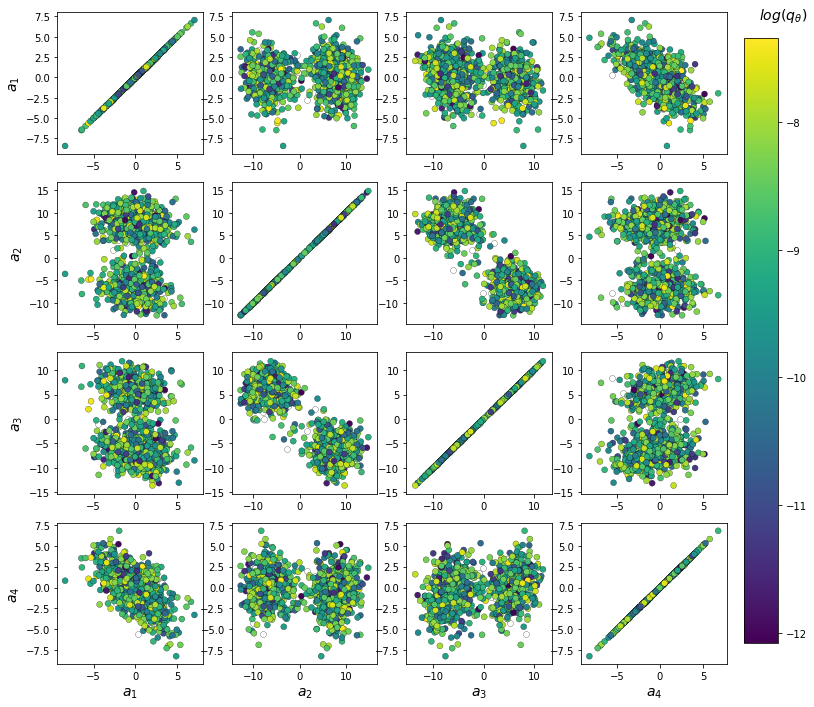

[<Figure size 864x864 with 17 Axes>]

In [21]:
dsn_pairplots([fname], 'Zs', system, system.D, f_str='identity', \
                c_str='log_q_z', legendstrs=[], AL_final_its=AL_final_its, \
                fontsize=14, ellipses=False, \
                pfname='temp1.png')

Assuming T(x) = [first moments, second moments].
Setting D = |T(x)|/2.
-9.382728419505638 1.3615094679700444
p b o (956,) (44,) (0,)


NotImplementedError: 

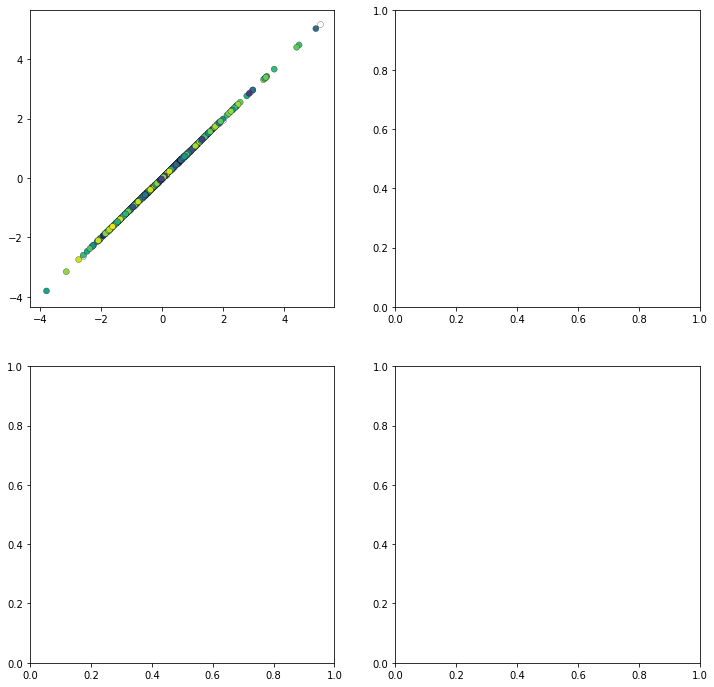

In [22]:
dsn_pairplots([fname], 'T_xs', system, 1000, f_str='identity', \
                c_str='log_q_z', legendstrs=[], AL_final_its=AL_final_its, \
                fontsize=14, ellipses=True, \
                pfname='temp.png')

In [ ]:
# need to update T_x_labels and behavior documentation for system and linear_2D